# Python for Data Management - Titanic Data Set

#### Note: The notebook is designed to give you the demonstration of techniques and concepts that we learnt from the LVC - we will discuss in deep of the techniques in the mentor learning session by taking a industry scenario

In [53]:
import numpy as  np
import pandas as pd
from warnings import filterwarnings
filterwarnings("ignore")

Importing data file        
The below code shows how to read data from a specific tab from an excel file.      
File name - Titanic+Data+Set.csv    
Tab name - Titanic Data Set

### Data Loading

In [54]:
df=pd.read_csv("Titanic+Data+Set.csv")   # to read csv file, replace read_excel with read_csv

Checking Top 5 Rows of the data 

In [55]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Checking Bottom 5 Rows 

In [56]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### Data Understanding

Checking the Shape of the dataset

In [57]:
print("Total rows in the dataset: ", df.shape[0])
print("Total columns in the dataset: ", df.shape[1])

Total rows in the dataset:  891
Total columns in the dataset:  12


Checking the info on each column of Dataset 

In [52]:
# Read the dataset
df = pd.read_csv('Titanic.csv') 
# modify this code with the name of your file

# Print the shape of dataframe - 'df'
df.shape

FileNotFoundError: [Errno 2] No such file or directory: 'Titanic.csv'

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


There are 2 Float variables , 5 Integer variables and 5 object variables in the data set.     
Also There are 3 variables which show Null values   
Age is a float variable , we will check in further steps if there is need to change it to integer      
We are building the model to predict PassengerId seems irrelevant to data. We will be dropping this variable in the upcoming steps    

Checking the 5 point summary , Descriptive Statistics of the dataset 

In [40]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Braund, Mr. Owen Harris",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


Observations :-     
This table includes the complete description for all variables.    
The description includes variable count, count of unique values,frequency, mean, standard deviation, minimum, 25%, 50%(median), 75%, and maximum values present in the respective variables.     
The ‘NaN’ shown is observed for Categorical Variables as a string object cannot have numeric values.  
This can be changed by encoding the data in future steps if needed.   
There are  missing values shown as the count is not constant for all the variables.       
Unique values are shown for only categorical variables which depict count for a specific categories in that variable.    
One descripency seen is that Gender shows unque count of 3 , ideally it should be 2 male and female, we will investigate and take neceassaey steps to treat if reqiured in future steps.     


# Data Cleaning and Preprocessing

## 1. Handle Missing Values

Checking count of missing values as per variables 

In [41]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The Missing values can affect the prediction’s hence need to be treated.    
We would trreat the  missing values by imputing with the median values in the respective column.

Treating the missing values by imputing with median.

In [42]:
(df.isna().sum()).sum()

866

In [10]:
df.fillna(df.median(),inplace=True)

checking missing value counts again after treating missing values 

In [44]:
def drop_column_with_max_missing(df):
    # Find the column with the maximum number of missing values
    column_with_max_missing = df.isnull().sum().idxmax()
    
    # Drop the column with the maximum number of missing values
    df_dropped = df.drop(column_with_max_missing, axis=1)
    
    return df_dropped

def count_missing_values(df):
    # Calculate the number of missing values in the DataFrame
    missing_values_count = df.isnull().sum().sum()
    
    return missing_values_count

In [45]:
# Drop the column with the maximum number of missing values
df_dropped = drop_column_with_max_missing(df)

# Calculate the number of missing values in the remaining data
missing_values_count = count_missing_values(df_dropped)

print("Number of missing values:", missing_values_count)

Number of missing values: 179


In [11]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

All the missing values are treated now.

## 2. Removing Duplicates

We will check for any duplicates in data

In [12]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


There are no duplicates in the data          
In case data showd any duplicates, the code to drop duplicates is :-                 
**df.drop_duplicates(keep=False)**


## 3. Data Type Conversion

In [13]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Age variablle is in float data type , lets convert in to int for better model results

In [14]:
df.Age=df.Age.astype('int64')

Checking data type for the age variable again 

In [15]:
df['Age'].dtype

dtype('int64')

## 4. Outlier Detection

In [16]:
import matplotlib.pyplot as plt  

#### Note: We will gonna discuss Matplotlib in depth in the upcoming week exploratory data analysis

Checking outliers in dataset per variable before we treat outliers

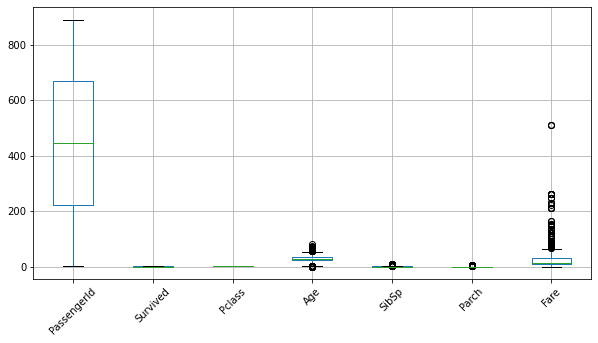

In [17]:
df.boxplot(figsize=(10,5))
plt.xticks(rotation=45)
plt.show()

The column `SumAssured` has outliers 

In [18]:
# First we will seperate the numerical variables in a dataframe df_num
df_num = df.select_dtypes(exclude = ['object'])
lstnumericcolumns = list(df_num.columns.values)
columnnumlen=len(lstnumericcolumns)
print("Total numerical Columns = ",columnnumlen)

Total numerical Columns =  7


In [19]:
# we will first Create a user defined function to treat outliers
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [20]:
for column in df_num.columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

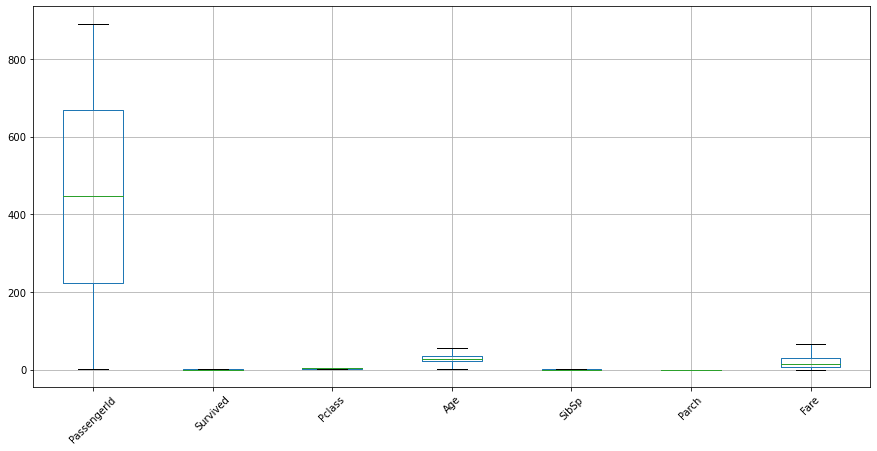

In [21]:
df.boxplot(figsize=(15,7))
plt.xticks(rotation=45)
plt.show()

All outliers are treated

## 5. Encoding

Divide the categorical columns in a new dataframe to make it easy for encoding categorical data

In [22]:
df_cat = df.select_dtypes(include = ['object'])
print("Total Categorical Columns = ",df_cat.shape[1])

Total Categorical Columns =  5


In [25]:
df_cat.head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S


In [31]:
df_cat['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

### 5.1 One-Hot Encoding

In [32]:
one_hot = pd.get_dummies(df_cat,drop_first=True)
one_hot.head()

,"Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel","Name_Abelson, Mrs. Samuel (Hannah Wizosky)","Name_Adahl, Mr. Mauritz Nils Martin","Name_Adams, Mr. John","Name_Ahlin, Mrs. Johan (Johanna Persdotter Larsson)","Name_Aks, Mrs. Sam (Leah Rosen)","Name_Albimona, Mr. Nassef Cassem","Name_Alexander, Mr. William",...,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_Q,Embarked_S
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### 5.2 Label Encoding

In [48]:
from sklearn.preprocessing import LabelEncoder

label_enc = ['Post Graduate', 'Under Graduate', 'Engineer', 'Diploma', 'MBA']

# Initialize the LabelEncoder
encoder = LabelEncoder()

# Fit and transform the data
encoded_data = encoder.fit_transform(label_enc)

print(encoded_data)

[3 4 1 0 2]


## 6. Feature Scaling

In [56]:
df['AgentBonus'].describe()

count    4520.000000
mean     4062.773894
std      1358.284526
min      1605.000000
25%      3027.750000
50%      3911.500000
75%      4867.250000
max      7626.500000
Name: AgentBonus, dtype: float64

If you notice, the range of values in the column `AgentBonus` from 1605 to 7627 which brings huge difference between the range of values in other variables in the dataset. To avoid that, lets scale `AgentBonus` column in the same range of other variables

### 6.1 Normalization

In [54]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

age_scale = df[['AgentBonus']]

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
normalized_data = scaler.fit_transform(age_scale)

print("Normalized data:")
print(normalized_data)

Normalized data:
[[0.4656647 ]
 [0.10113759]
 [0.44307897]
 ...
 [0.36319854]
 [0.53325583]
 [0.52462011]]


Note:  \
    1. Normalization scales the features to a fixed range, typically [0, 1]. It is useful when the features have different scales and the algorithm being used assumes that the features are on the same scale. \
    2. For each feature, normalization subtracts the minimum value of the feature and then divides by the range (max value - min value).\
    3. Normalization can be sensitive to outliers since it's based on the minimum and maximum values of the features.

### 6.2 Standardization

In [58]:
from sklearn.preprocessing import StandardScaler
import numpy as np

age_scale = df[['AgentBonus']]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
standardized_data = scaler.fit_transform(age_scale)

print("Standardized data:")
print(standardized_data)

Standardized data:
[[ 0.25492775]
 [-1.36126003]
 [ 0.15479037]
 ...
 [-0.19937196]
 [ 0.55460357]
 [ 0.51631575]]


Note: \
    1. Standardization transforms the features to have a mean of 0 and a standard deviation of 1. It is useful when the features have different scales and the algorithm being used does not make assumptions about the distribution of the features. \
    2. For each feature, standardization subtracts the mean of the feature and then divides by the standard deviation of the feature. \
    3. Standardization is less affected by outliers compared to normalization because it uses the mean and standard deviation, which are less influenced by extreme values.